#**Process Analysis** en **Time Series Analysis** BPIC2019

In [ ]:
!pip install pm4py DyLoPro pandas numpy matplotlib seaborn


In [ ]:
from google.colab import files
import pandas as pd
import pm4py

# Upload de dataset handmatig
uploaded = files.upload()

# 1. Laad de dataset
df_wt = pd.read_csv("bpic2019_behavior_results (4).csv", parse_dates=["timestamp_i", "timestamp_j"])
df_wt.head()


Saving bpic2019_behavior_results (4).csv to bpic2019_behavior_results (4) (1).csv


,case_id,event_i,timestamp_i,event_j,timestamp_j,actor_i,actor_j,behavior,case:Goods Receipt,delta_t
0,4507004563_00100,Vendor creates invoice,2018-03-12 22:59:00,Record Goods Receipt,2018-03-13 12:39:00,NONE,user_168,HI,True,49200.0
1,4507004563_00100,Record Goods Receipt,2018-03-13 12:39:00,Record Invoice Receipt,2018-03-20 09:28:00,user_168,user_020,HI,True,593340.0
2,4507004563_00100,Record Invoice Receipt,2018-03-20 09:28:00,Clear Invoice,2018-05-24 11:32:00,user_020,user_002,HI,True,5623440.0
3,4507004563_00110,Create Purchase Order Item,2018-01-22 15:21:00,Vendor creates invoice,2018-03-05 22:59:00,user_167,NONE,HI,True,3656280.0
4,4507004563_00110,Vendor creates invoice,2018-03-05 22:59:00,Record Goods Receipt,2018-03-06 12:59:00,NONE,user_168,HI,True,50400.0


In [ ]:
import io
import pandas as pd

# Automatisch de bestandsnaam pakken
filename = next(iter(uploaded))

# Lees de CSV in
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Bekijk kolommen
print(df.columns)


Index(['case_id', 'event_i', 'timestamp_i', 'event_j', 'timestamp_j',
       'actor_i', 'actor_j', 'behavior', 'case:Goods Receipt', ' delta_t'],
      dtype='object')


In [ ]:
#correcte kolomnamen toewijzen voor DyLoPro
df_wt.rename(columns={"case_id": "case:concept:name",
                       "event_i": "concept:name",
                       "timestamp_i": "time:timestamp","case:Goods Receipt":"Goods Receipt"}, inplace=True)
df_wt.head()


,case:concept:name,concept:name,time:timestamp,event_j,timestamp_j,actor_i,actor_j,behavior,Goods Receipt,delta_t
0,4507004563_00100,Vendor creates invoice,2018-03-12 22:59:00,Record Goods Receipt,2018-03-13 12:39:00,NONE,user_168,HI,True,49200.0
1,4507004563_00100,Record Goods Receipt,2018-03-13 12:39:00,Record Invoice Receipt,2018-03-20 09:28:00,user_168,user_020,HI,True,593340.0
2,4507004563_00100,Record Invoice Receipt,2018-03-20 09:28:00,Clear Invoice,2018-05-24 11:32:00,user_020,user_002,HI,True,5623440.0
3,4507004563_00110,Create Purchase Order Item,2018-01-22 15:21:00,Vendor creates invoice,2018-03-05 22:59:00,user_167,NONE,HI,True,3656280.0
4,4507004563_00110,Vendor creates invoice,2018-03-05 22:59:00,Record Goods Receipt,2018-03-06 12:59:00,NONE,user_168,HI,True,50400.0


In [ ]:
print(df_wt.head())  # Check the first few rows of the DataFrame
print(df_wt.columns)  # Ensure column names are correct


  case:concept:name                concept:name      time:timestamp  \
0  4507004563_00100      Vendor creates invoice 2018-03-12 22:59:00   
1  4507004563_00100        Record Goods Receipt 2018-03-13 12:39:00   
2  4507004563_00100      Record Invoice Receipt 2018-03-20 09:28:00   
3  4507004563_00110  Create Purchase Order Item 2018-01-22 15:21:00   
4  4507004563_00110      Vendor creates invoice 2018-03-05 22:59:00   

                  event_j         timestamp_j   actor_i   actor_j behavior  \
0    Record Goods Receipt 2018-03-13 12:39:00      NONE  user_168       HI   
1  Record Invoice Receipt 2018-03-20 09:28:00  user_168  user_020       HI   
2           Clear Invoice 2018-05-24 11:32:00  user_020  user_002       HI   
3  Vendor creates invoice 2018-03-05 22:59:00  user_167      NONE       HI   
4    Record Goods Receipt 2018-03-06 12:59:00      NONE  user_168       HI   

   Goods Receipt    delta_t  
0           True    49200.0  
1           True   593340.0  
2           Tr

#How many cases per behavior type

timestamp_i    datetime64[ns, UTC]
timestamp_j    datetime64[ns, UTC]
dtype: object
timestamp_i    0
behavior       0
dtype: int64


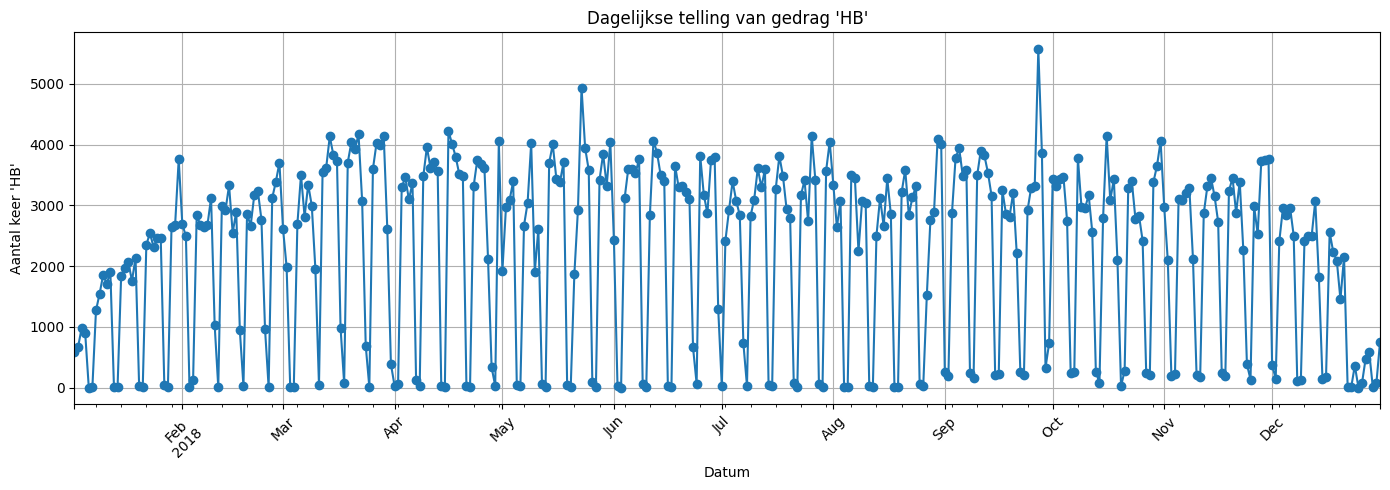

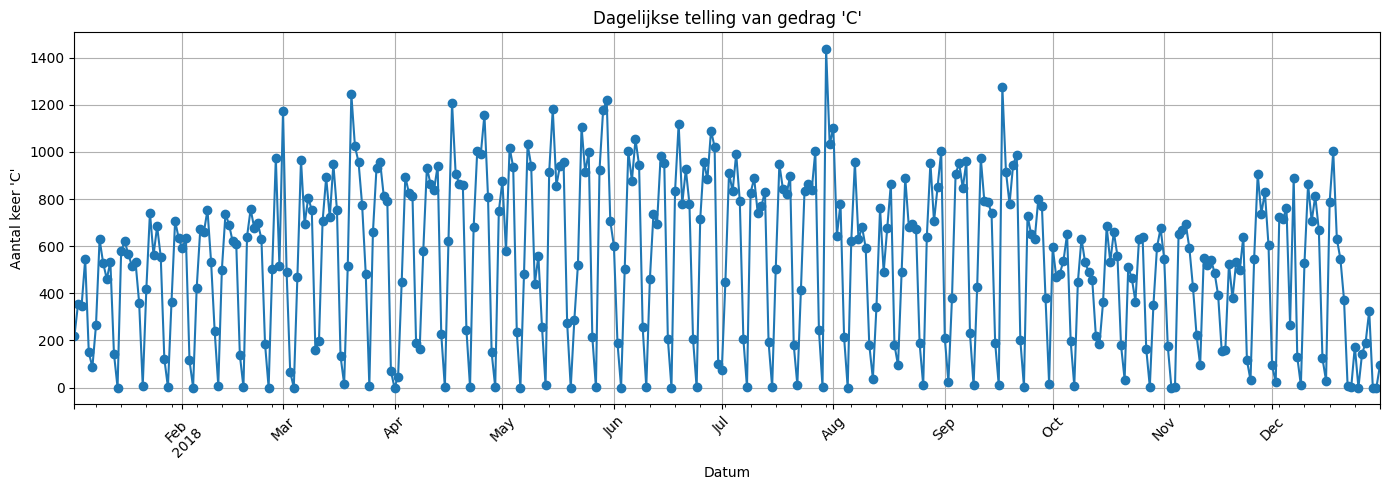

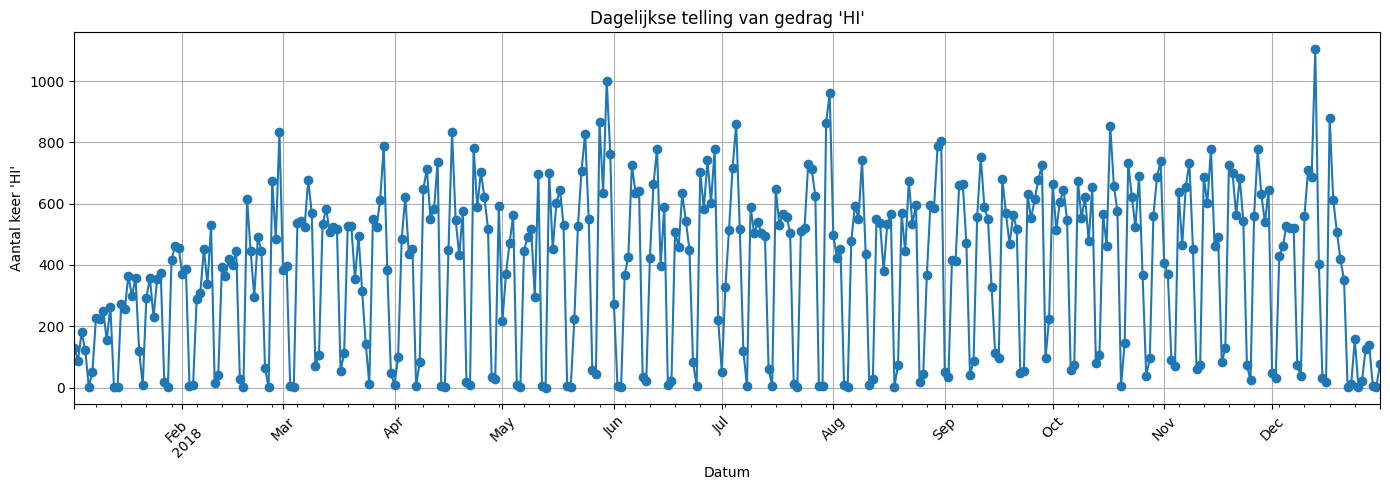

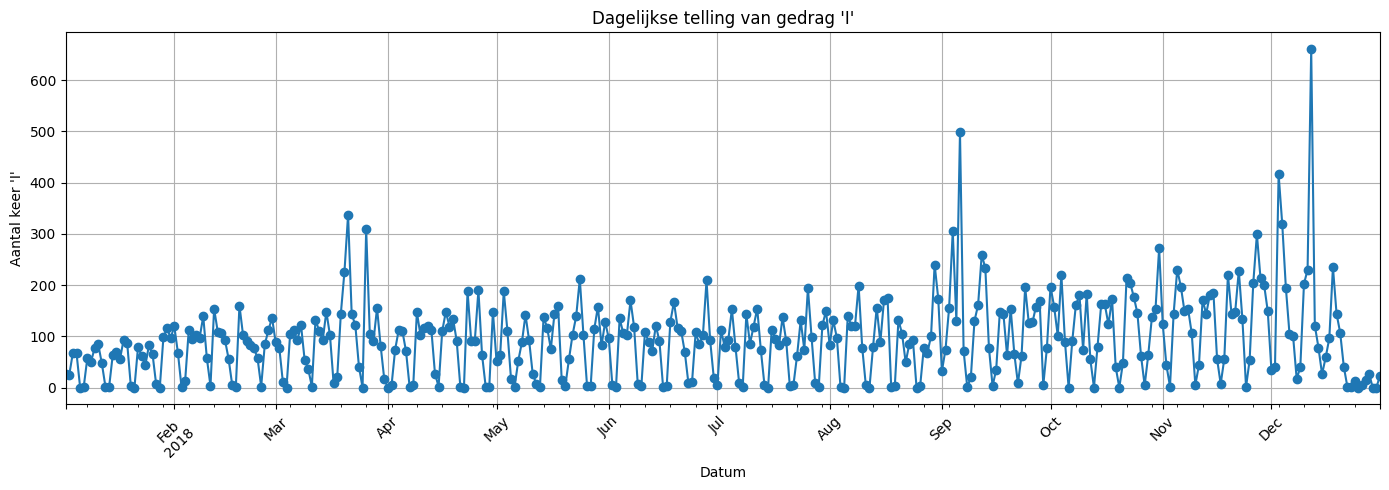

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Zet timestamps om naar datetime
df['timestamp_i'] = pd.to_datetime(df['timestamp_i'], errors='coerce', utc=True)
df['timestamp_j'] = pd.to_datetime(df['timestamp_j'], errors='coerce', utc=True)

# Filter alleen geldige en relevante jaren
df = df[df['timestamp_i'].notna()]
df = df[(df['timestamp_i'] >= '2018-01-01') & (df['timestamp_i'] <= '2019-01-01')]

# Controleer parsing & missende data
print(df[['timestamp_i', 'timestamp_j']].dtypes)
print(df[['timestamp_i', 'behavior']].isna().sum())

# Groepeer per dag
behavior_daily = df.groupby([
    df['timestamp_i'].dt.floor('D'),
    'behavior'
]).size().unstack(fill_value=0)

# Top 4 gedragstypes
top_behaviors = df['behavior'].value_counts().head(4).index.tolist()

# 📈 Visualisatie per dag
for behavior in top_behaviors:
    plt.figure(figsize=(14, 5))
    behavior_daily[behavior].plot(marker='o')
    plt.title(f"Dagelijkse telling van gedrag '{behavior}'")
    plt.xlabel("Datum")
    plt.ylabel(f"Aantal keer '{behavior}'")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




Time Series generation for granger

In [ ]:
all_series = []
# Stap 2: Algemene time series voor alle data
behavior_daily = df_wt.groupby([
    df_wt['time:timestamp'].dt.floor('D'),
    'behavior'
]).size().unstack(fill_value=0)

top_behaviors = df_wt['behavior'].value_counts().head(4).index.tolist()

for behavior in top_behaviors:
    if behavior in behavior_daily.columns:
        s = behavior_daily[behavior].rename(f"All_{behavior}")
        all_series.append(s)

# Stap 3: Per user (dagelijks)
#user_list = ['User_1', 'User_2', 'User_3', 'User_5', 'User_49', 'User_53']

#for user in user_list:
#    df_user = df_wt[df_wt['actor_i'] == user]
#    if df_user.empty:
#        continue
#    daily = df_user.groupby([
#        df_user['time:timestamp'].dt.floor('D'),
#        'behavior'
#    ]).size().unstack(fill_value=0)
#    top_behaviors_user = df_user['behavior'].value_counts().head(4).index.tolist()
#    for behavior in top_behaviors_user:
#        if behavior in daily.columns:
#            s = daily[behavior].rename(f"{user}_{behavior}")
#            all_series.append(s)

# Stap 4: Per activiteit (dagelijks)
#activity_list = [
#    "W_Validate application", "W_Call after offers", "W_Call incomplete files",
#    "W_Complete application", "W_Handle leads", "O_Create Offer", "O_Created",
#    "O_Sent (mail and online)", "A_Validating", "A_Create Application",
#    "A_Concept", "A_Accepted", "A_Complete", "O_Returned", "A_Incomplete",
#    "O_Cancelled", "A_Submitted", "O_Accepted", "A_Pending", "A_Cancelled"
#]

#for activity in activity_list:
#    df_act = df_wt[df_wt['concept:name'] == activity]
#    if df_act.empty:
#        continue
##    daily = df_act.groupby([
#        df_act['time:timestamp'].dt.floor('D'),
#        'behavior'
#    ]).size().unstack(fill_value=0)
#    top_behaviors_act = df_act['behavior'].value_counts().head(4).index.tolist()
#    for behavior in top_behaviors_act:
#        if behavior in daily.columns:
#            s = daily[behavior].rename(f"{activity}_{behavior}")
#            all_series.append(s)

# Stap 5: Combineer alles
df_all = pd.concat(all_series, axis=1).sort_index()
df_all = df_all.fillna(0)

# Resultaat bekijken
print(df_all.shape)
df_all.head()



(475, 4)


,All_HB,All_C,All_HI,All_I
time:timestamp,,,,
1948-01-26,5,5,0,0
1993-05-18,9,0,0,0
2001-01-23,1,0,0,0
2001-02-19,1,0,0,0
2001-02-23,1,0,0,0


#Fraction and Duration of a case per outcome (Goods Receipt True or False)


Preprocessing the data...


/usr/local/lib/python3.11/dist-packages/DyLoPro/preprocess_utils.py:105: UserWarning: In some cases in the given log, the events were not ordered correctly based on their timestamp. In the DynamicLogPlots instance' internal representation of the log, this problem is resolved by correctly sorting the events.
  warnings.warn(warning_message)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return fn(*args, **kwargs)
100%|██████████| 1188017/1188017 [01:44<00:00, 11390

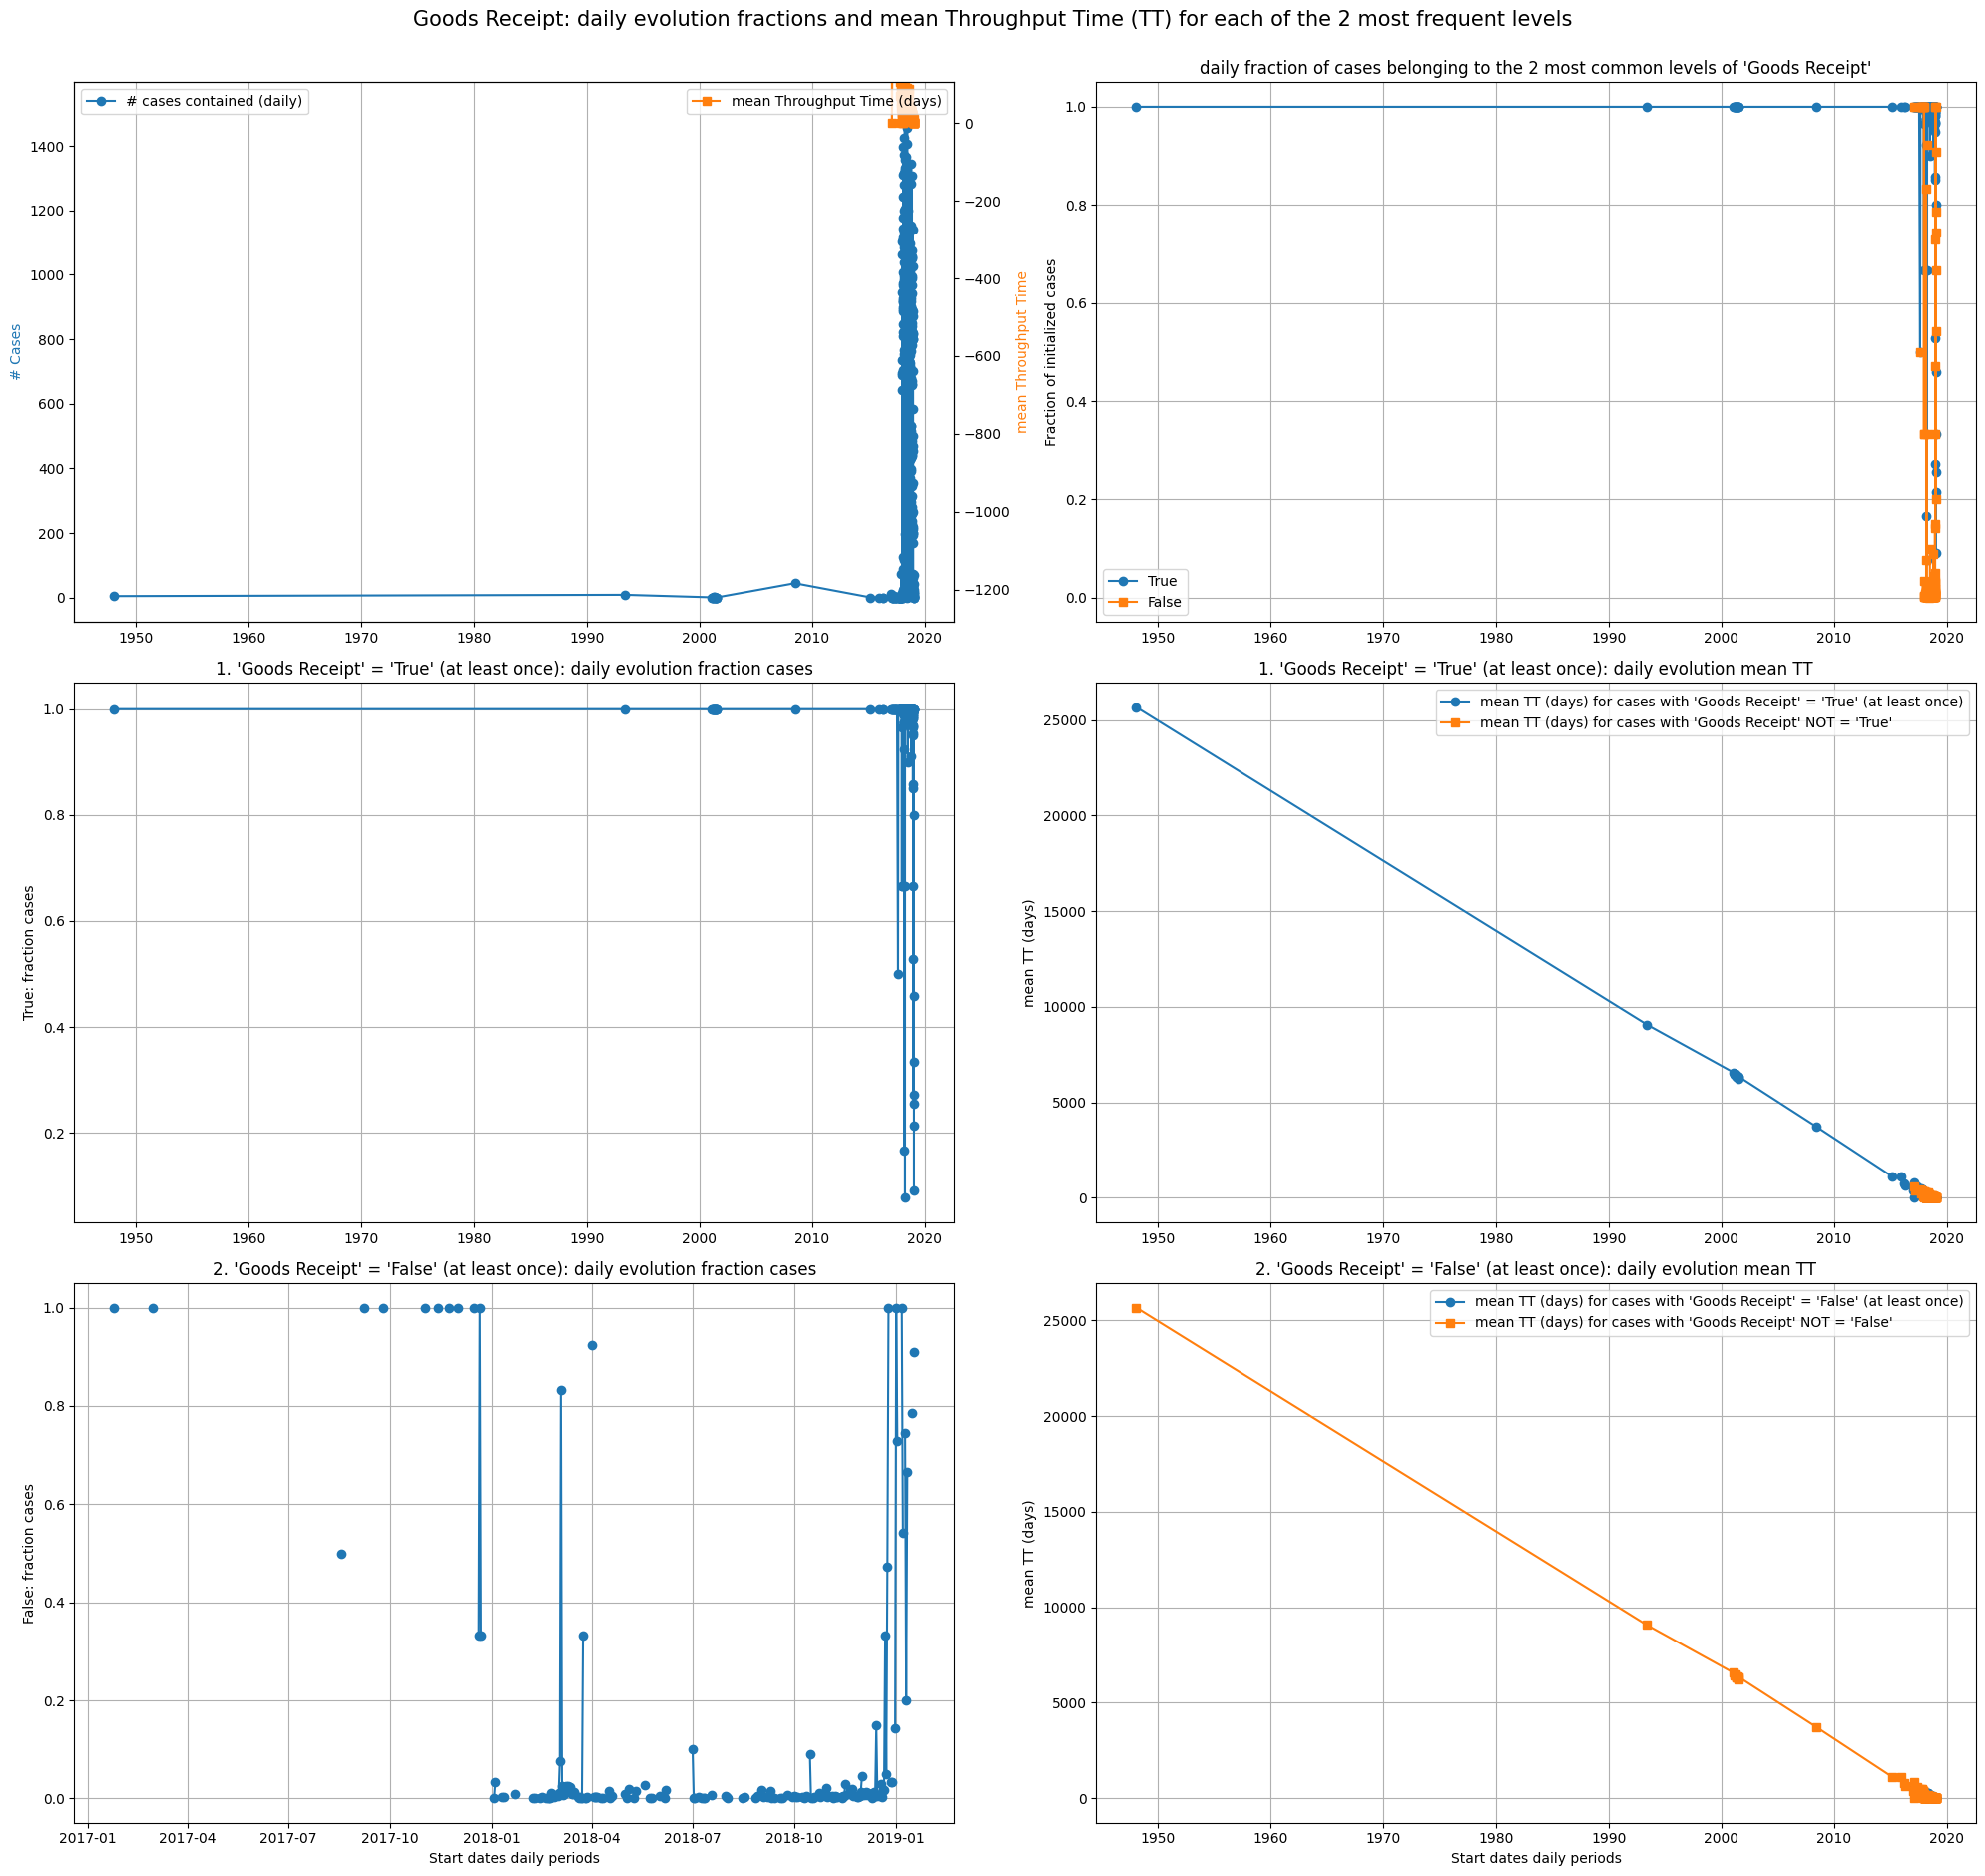

In [ ]:
import pandas as pd
from DyLoPro import DynamicLogPlots

# Zet timestamp naar datetime en Accepted naar categorisch
df_wt['time:timestamp'] = pd.to_datetime(df_wt['time:timestamp'])

# Initialiseer DyLoPro met correcte dataframe
dlp = DynamicLogPlots(
    event_log=df_wt,
    case_id_key='case:concept:name',
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    categorical_eventfeatures=['Goods Receipt']
)

#fraction of cases with at least one of the 4 actor behavior types + duration of the cases with at least one of these 4 behavior types
dlp.topK_categorical_eventftr_evol(
    event_feature='Goods Receipt',
    frequency='daily',
    plt_type='type_tt',
    numeric_agg='mean',
    max_k=4,
    xtr_outlier_rem=True)


Time Series generation for granger

In [ ]:
#  Zet timestamp om en filter op geldige periode
df_wt['time:timestamp'] = pd.to_datetime(df_wt['time:timestamp'], errors="coerce", utc=True)
df_wt = df_wt[df_wt['time:timestamp'].between('2018-01-01', '2020-12-31')]


# Bereken start- en eindtijd per case
case_durations = df_wt.groupby('case:concept:name').agg(
    start=('time:timestamp', 'min'),
    end=('time:timestamp', 'max'),
    outcome=('Goods Receipt', 'first')  # outcome is per case
)

# Bereken de duur in uren
case_durations['duration'] = (case_durations['end'] - case_durations['start']).dt.total_seconds() / 3600

# ➜ Verander naar dagelijkse aggregatie
case_durations['start_hour'] = case_durations['start'].dt.to_period('D').apply(lambda r: r.start_time)

# Aantal cases per dag totaal
total_per_day = case_durations.groupby('start_hour').size()

# Aantal cases per dag per outcome
outcome_counts = case_durations.groupby(['start_hour', 'outcome']).size().unstack(fill_value=0)

# Fractie per outcome per dag
outcome_fractions = outcome_counts.divide(total_per_day, axis=0)
outcome_fractions.columns = [f"fraction_{col}" for col in outcome_fractions.columns]

# Gemiddelde duur per outcome per uur
outcome_durations = case_durations.groupby(['start_hour', 'outcome'])['duration'].mean().unstack(fill_value=0)
outcome_durations.columns = [f"duration_{col}" for col in outcome_durations.columns]

# Combineer
df_outcome_series = pd.concat([outcome_fractions, outcome_durations], axis=1).sort_index().fillna(0)

# Check resultaat
print(df_outcome_series.shape)
df_outcome_series.head(100)

(377, 4)


,fraction_False,fraction_True,duration_False,duration_True
start_hour,,,,
2018-01-02,0.000000,1.000000,0.000000,1236.176851
2018-01-03,0.003067,0.996933,3568.550000,1003.354385
2018-01-04,0.037832,0.962168,4151.063514,1030.991923
2018-01-05,0.000000,1.000000,0.000000,824.985479
2018-01-06,0.000000,1.000000,0.000000,475.855556
...,...,...,...,...
2018-04-07,0.000000,1.000000,0.000000,1047.739157
2018-04-08,0.000000,1.000000,0.000000,358.134848
2018-04-09,0.001474,0.998526,2619.958333,1289.768143


In [ ]:
# Filter index van outcome-series op realistische datums
df_outcome_series = df_outcome_series.loc["2018-01-01":"2019-01-01"]

# Eventueel ook df_all filteren
df_all = df_all.loc["2018-01-01":"2019-01-01"]

# Combineer veilig
df_all_combined = pd.concat([df_all, df_outcome_series], axis=1)

# Exporteren
df_all_combined.to_csv("df_all_combined_bpic2019.csv")

# Download in Colab
from google.colab import files
files.download("df_all_combined_bpic2019.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Granger Causalities

In [1]:
#inlezen csv
from google.colab import files
uploaded = files.upload()


Saving df_all_combined_bpic2019 (6).csv to df_all_combined_bpic2019 (6).csv


In [2]:
import io
import pandas as pd

# Inlezen van het bestand
df_all_combined = pd.read_csv(io.BytesIO(uploaded['df_all_combined_bpic2019 (6).csv']))


In [3]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import pandas as pd

# Functies
def is_stationary(series, alpha=0.05):
    """Check stationariteit via ADF-test."""
    result = adfuller(series.dropna())
    return result[1] < alpha

def make_stationary(series):
    """Eerste verschil nemen om stationair te maken."""
    return series.diff()

def print_adf_result(series, name, alpha=0.05):
    """Print ADF-statistieken."""
    series = series.dropna()
    result = adfuller(series)
    test_stat, p_value, lags, n_obs, crit_values, _ = result

    print(f"\n🔍 ADF Test voor '{name}':")
    print(f" - Teststatistiek: {test_stat:.4f}")
    print(f" - p-waarde: {p_value:.4f}")
    for key, val in crit_values.items():
        print(f" - Kritieke waarde ({key}): {val:.4f}")
    if p_value < alpha:
        print(" ✅ Stationair")
    else:
        print(" ❌ Niet-stationair → wordt gedifferentieerd")

# Kolommen
X_columns = ['All_C', 'All_HB', 'All_HI', 'All_I']
Y_columns = ['fraction_True', 'duration_True']
max_lag = 3

# Voor het bewaren van stationaire series
stationary_df = pd.DataFrame(index=df_all_combined.index)

# Granger resultaten opslaan
results = []

# Loop door combinaties
for x in X_columns:
    for y in Y_columns:
        try:
            data = df_all_combined[[x, y]].dropna()

            # ADF printen
            print_adf_result(data[x], name=x)
            print_adf_result(data[y], name=y)

            # Stationaire reeksen toevoegen
            stationary_df[x] = make_stationary(data[x]) if not is_stationary(data[x]) else data[x]
            stationary_df[y] = make_stationary(data[y]) if not is_stationary(data[y]) else data[y]

            # Bereid data voor Granger test
            data_granger = stationary_df[[y, x]].dropna()

            test_result = grangercausalitytests(data_granger, maxlag=max_lag, verbose=False)
            p_values = [test_result[lag][0]['ssr_ftest'][1] for lag in range(1, max_lag + 1)]

        except Exception as e:
            print(f"⚠️ Fout bij combinatie {x} ➝ {y}: {e}")
            p_values = [None] * max_lag

        result = {'X (cause)': x, 'Y (effect)': y}
        for lag in range(1, max_lag + 1):
            result[f'p_lag{lag}'] = p_values[lag - 1]
        results.append(result)

# Resultaten als DataFrame
granger_df = pd.DataFrame(results)

# Bekijk resultaten
granger_df




🔍 ADF Test voor 'All_C':
 - Teststatistiek: -1.8697
 - p-waarde: 0.3465
 - Kritieke waarde (1%): -3.4493
 - Kritieke waarde (5%): -2.8699
 - Kritieke waarde (10%): -2.5712
 ❌ Niet-stationair → wordt gedifferentieerd

🔍 ADF Test voor 'fraction_True':
 - Teststatistiek: -2.8564
 - p-waarde: 0.0507
 - Kritieke waarde (1%): -3.4488
 - Kritieke waarde (5%): -2.8697
 - Kritieke waarde (10%): -2.5711
 ❌ Niet-stationair → wordt gedifferentieerd

🔍 ADF Test voor 'All_C':
 - Teststatistiek: -1.8697
 - p-waarde: 0.3465
 - Kritieke waarde (1%): -3.4493
 - Kritieke waarde (5%): -2.8699
 - Kritieke waarde (10%): -2.5712
 ❌ Niet-stationair → wordt gedifferentieerd

🔍 ADF Test voor 'duration_True':
 - Teststatistiek: -0.9256
 - p-waarde: 0.7794
 - Kritieke waarde (1%): -3.4491
 - Kritieke waarde (5%): -2.8698
 - Kritieke waarde (10%): -2.5712
 ❌ Niet-stationair → wordt gedifferentieerd

🔍 ADF Test voor 'All_HB':
 - Teststatistiek: -1.2106
 - p-waarde: 0.6690
 - Kritieke waarde (1%): -3.4492
 - Kritie

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



🔍 ADF Test voor 'All_HI':
 - Teststatistiek: -2.6483
 - p-waarde: 0.0834
 - Kritieke waarde (1%): -3.4492
 - Kritieke waarde (5%): -2.8698
 - Kritieke waarde (10%): -2.5712
 ❌ Niet-stationair → wordt gedifferentieerd

🔍 ADF Test voor 'fraction_True':
 - Teststatistiek: -2.8564
 - p-waarde: 0.0507
 - Kritieke waarde (1%): -3.4488
 - Kritieke waarde (5%): -2.8697
 - Kritieke waarde (10%): -2.5711
 ❌ Niet-stationair → wordt gedifferentieerd

🔍 ADF Test voor 'All_HI':
 - Teststatistiek: -2.6483
 - p-waarde: 0.0834
 - Kritieke waarde (1%): -3.4492
 - Kritieke waarde (5%): -2.8698
 - Kritieke waarde (10%): -2.5712
 ❌ Niet-stationair → wordt gedifferentieerd

🔍 ADF Test voor 'duration_True':
 - Teststatistiek: -0.9256
 - p-waarde: 0.7794
 - Kritieke waarde (1%): -3.4491
 - Kritieke waarde (5%): -2.8698
 - Kritieke waarde (10%): -2.5712
 ❌ Niet-stationair → wordt gedifferentieerd

🔍 ADF Test voor 'All_I':
 - Teststatistiek: -3.5870
 - p-waarde: 0.0060
 - Kritieke waarde (1%): -3.4492
 - Kriti

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


,X (cause),Y (effect),p_lag1,p_lag2,p_lag3
0,All_C,fraction_True,0.120035,0.090510,0.096984
1,All_C,duration_True,0.058667,0.063202,0.100442
2,All_HB,fraction_True,0.094069,0.080705,0.072216
3,All_HB,duration_True,0.033841,0.078956,0.074648
4,All_HI,fraction_True,0.200593,0.169569,0.134034
5,All_HI,duration_True,0.006542,0.031296,0.051951
6,All_I,fraction_True,0.878467,0.177325,0.290156
7,All_I,duration_True,0.404118,0.368308,0.390730


In [4]:
!pip install group-lasso

🔍 Lag-selectie over (group_reg, l1_reg):
λg=0.1, λ1=0.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=0.1, λ1=0.1 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
λg=0.1, λ1=0.5 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=0.1, λ1=1.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
λg=0.5, λ1=0.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=0.5, λ1=0.1 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
λg=0.5, λ1=0.5 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=0.5, λ1=1.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22]
λg=1.0, λ1=0.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=1.0, λ1=0.1 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
λg=1.0, λ1=0.5 → geselecteerde lags: [ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=1.0, λ1=1.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22]
λg=2.0, λ1=0.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=2.0, λ1=0.1 → geselecteerde lags: [ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22]
λg=2.0, λ1=0.5 → geselecteerde lags: [ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=2.0, λ1=1.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22]
λg=5.0, λ1=0.0 → geselecteerde lags: [ 2  3  4  5  6  7  8 10 11 12 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=5.0, λ1=0.1 → geselecteerde lags: [ 2  3  4  5  6  7  8 10 11 12 14 15 16 17 18 19 20 21 22]
λg=5.0, λ1=0.5 → geselecteerde lags: [ 2  3  4  5  6  8 10 11 12 15 16 17 18 19 20 21]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=5.0, λ1=1.0 → geselecteerde lags: [ 2  3  4  5  6  8 10 11 12 15 16 17 18 19 20 21]
λg=10.0, λ1=0.0 → geselecteerde lags: [ 2 10 11 18 19 21]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=10.0, λ1=0.1 → geselecteerde lags: [ 2 10 11 18 19 21]
λg=10.0, λ1=0.5 → geselecteerde lags: [ 2 10 11 18 19 21]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=10.0, λ1=1.0 → geselecteerde lags: [ 2 10 11 19 21]

Top 5 meest causale lags: [10  2 11 19 21]
Top 6 meest causale lags: [18 10  2 11 19 21]
Top 7 meest causale lags: [ 3 18 10  2 11 19 21]


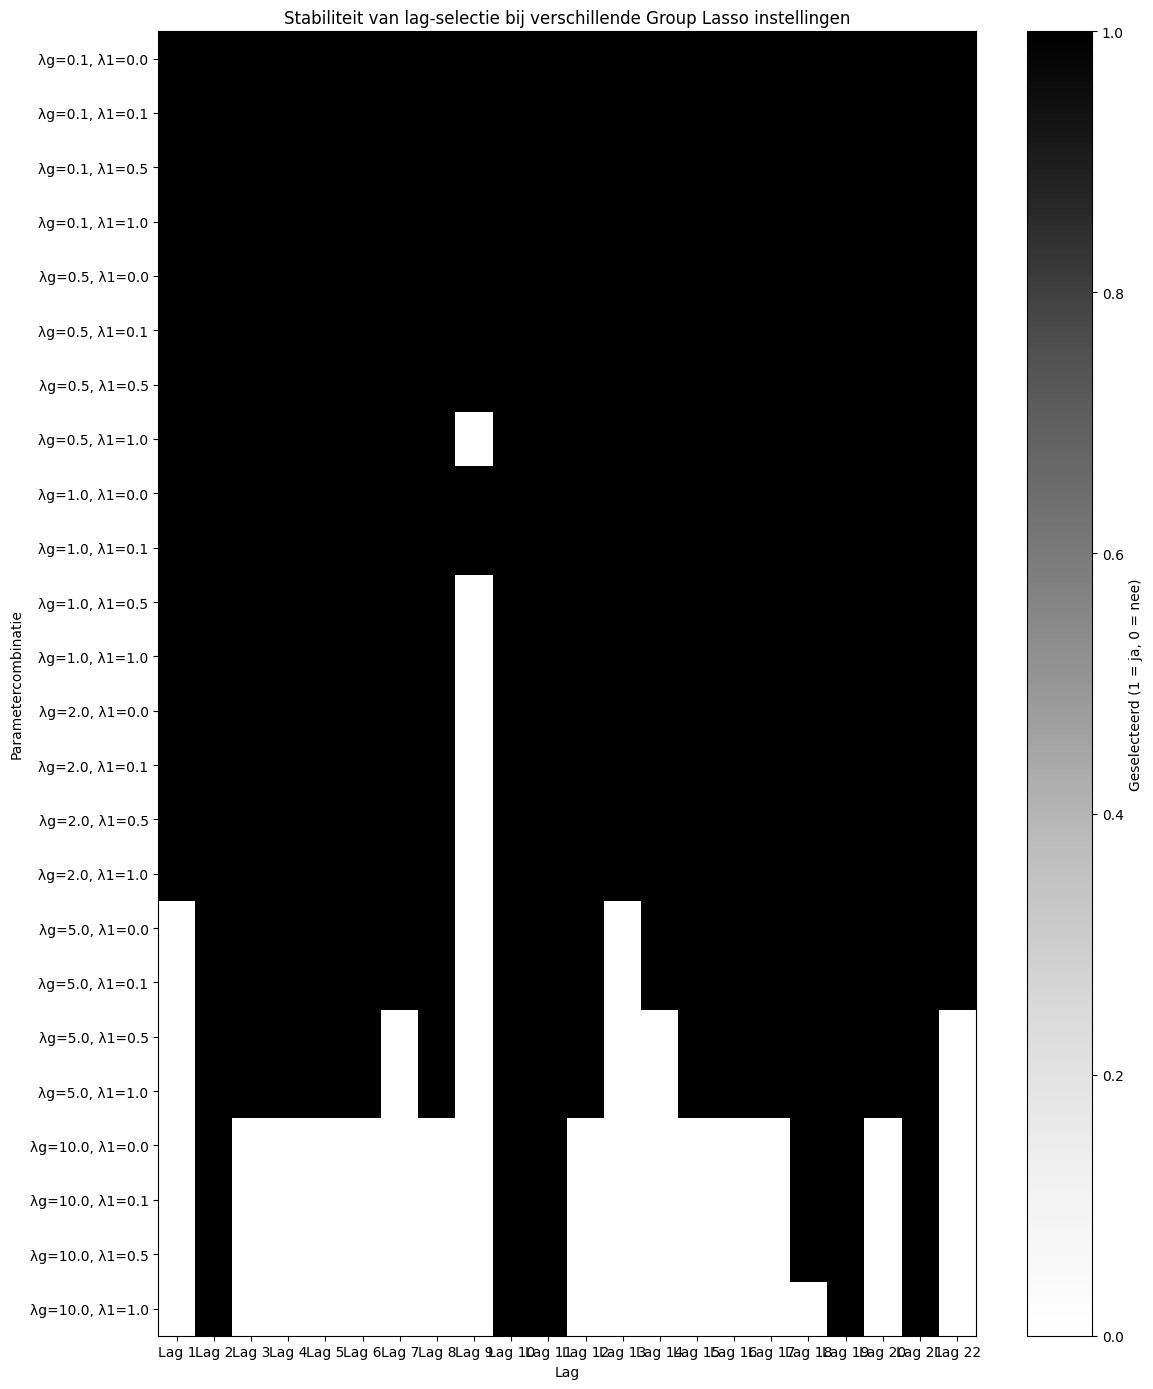

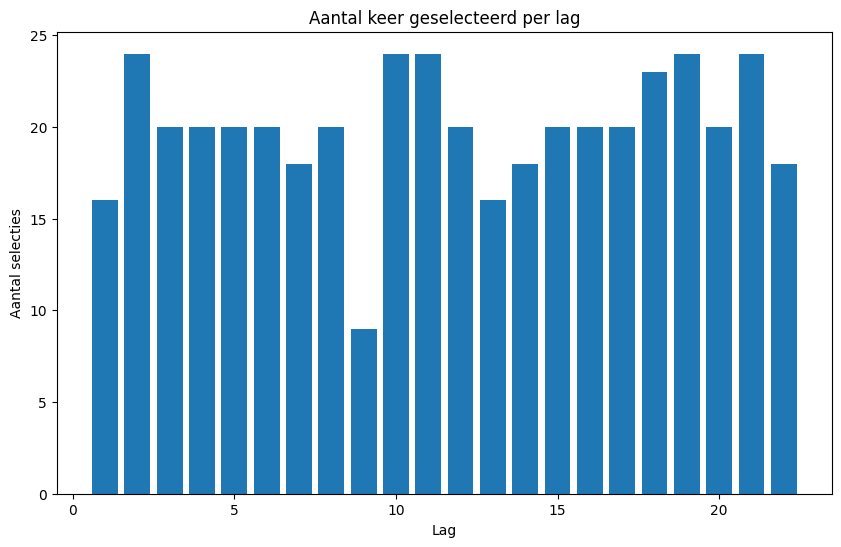

In [ ]:
import numpy as np
import pandas as pd
from group_lasso import GroupLasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from itertools import product

# ⚙️ Parameters
max_lag = 22  # working days
cause_cols = ['All_C', 'All_HB', 'All_HI', 'All_I']
effect_cols = ['fraction_True', 'duration_True']
df = stationary_df[cause_cols + effect_cols].dropna()

# 🔁 Lagged matrix bouwen
def create_lagged_input(df, cause_cols, effect_cols, max_lag):
    X_lagged, Y = [], []
    for t in range(max_lag, len(df)):
        lags = []
        for lag in range(1, max_lag + 1):
            lags.extend(df[cause_cols].iloc[t - lag].values)
        X_lagged.append(lags)
        Y.append(df[effect_cols].iloc[t].values)
    return np.array(X_lagged), np.array(Y)

X_lagged, Y = create_lagged_input(df, cause_cols, effect_cols, max_lag)

# 🔄 Normaliseren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lagged)

# 🎯 Group labels per lag (1 groep per blok)
n_causes = len(cause_cols)
groups = np.repeat(np.arange(max_lag), n_causes)

# 📐 Raster van hyperparameters
group_regs = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
l1_regs = [0.0, 0.1, 0.5, 1.0]
param_grid = list(product(group_regs, l1_regs))

# 📊 Resultaten opslaan
lag_matrix = np.zeros((len(param_grid), max_lag), dtype=int)
param_labels = []
lag_counts = np.zeros(max_lag, dtype=int)

print("🔍 Lag-selectie over (group_reg, l1_reg):")
for i, (group_reg, l1_reg) in enumerate(param_grid):
    model = GroupLasso(
        groups=groups,
        group_reg=group_reg,
        l1_reg=l1_reg,
        fit_intercept=True,
        supress_warning=True
    )
    model.fit(X_scaled, Y)
    selected_lags = np.unique(groups[np.any(model.coef_ != 0, axis=1)])
    for lag in selected_lags:
        lag_matrix[i, lag] = 1
        lag_counts[lag] += 1  # Count the number of times each lag is selected
    label = f"λg={group_reg}, λ1={l1_reg}"
    param_labels.append(label)
    print(f"{label} → geselecteerde lags: {selected_lags + 1 if len(selected_lags) > 0 else 'geen'}")

# 🥇 Select the top 5, 6, or 7 most frequent lags
top_5_lags = np.argsort(lag_counts)[-5:] + 1
top_6_lags = np.argsort(lag_counts)[-6:] + 1
top_7_lags = np.argsort(lag_counts)[-7:] + 1
print("\nTop 5 meest causale lags:", top_5_lags)
print("Top 6 meest causale lags:", top_6_lags)
print("Top 7 meest causale lags:", top_7_lags)

# 🖼️ Visualisatie als matrix
plt.figure(figsize=(12, len(param_grid) * 0.5 + 2))
plt.imshow(lag_matrix, cmap="Greys", aspect="auto")
plt.xticks(range(max_lag), [f"Lag {i+1}" for i in range(max_lag)])
plt.yticks(range(len(param_grid)), param_labels)
plt.xlabel("Lag")
plt.ylabel("Parametercombinatie")
plt.title("Stabiliteit van lag-selectie bij verschillende Group Lasso instellingen")
plt.colorbar(label="Geselecteerd (1 = ja, 0 = nee)")
plt.tight_layout()
plt.show()

# 📊 Plot most influential lags
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, max_lag+1), lag_counts)
plt.title("Aantal keer geselecteerd per lag")
plt.xlabel("Lag")
plt.ylabel("Aantal selecties")
plt.show()


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Kolommen
X_columns = ['All_C', 'All_HB', 'All_HI', 'All_I']
Y_columns = ['fraction_True', 'duration_True']
selected_lags = [2, 3, 10, 11, 18, 19, 21]  # Gebaseerd op Group Lasso-analyse

results = []

# Loop door alle combinaties van X ➡ Y
for x in X_columns:
    for y in Y_columns:
        try:
            data = stationary_df[[y, x]].dropna()
            test_result = grangercausalitytests(data, maxlag=max(selected_lags), verbose=False)

            result = {
                'X (cause)': x,
                'Y (effect)': y,
            }

            for lag in selected_lags:
                p_val = test_result[lag][0]['ssr_ftest'][1]
                result[f'p_lag{lag}'] = p_val

        except Exception as e:
            result = {'X (cause)': x, 'Y (effect)': y}
            for lag in selected_lags:
                result[f'p_lag{lag}'] = None

        results.append(result)

# Zet het in een DataFrame
granger_df_selected = pd.DataFrame(results)

# Bekijk de resultaten
from IPython.display import display
display(granger_df_selected)



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

,X (cause),Y (effect),p_lag2,p_lag3,p_lag10,p_lag11,p_lag18,p_lag19,p_lag21
0,All_C,fraction_True,0.090510,0.096984,0.166726,0.204269,0.057266,0.030511,0.060808
1,All_C,duration_True,0.063202,0.100442,0.063081,0.058715,0.143780,0.162912,0.063832
2,All_HB,fraction_True,0.080705,0.072216,0.198517,0.193905,0.333937,0.080397,0.021179
3,All_HB,duration_True,0.078956,0.074648,0.318036,0.228874,0.026729,0.083076,0.039076
4,All_HI,fraction_True,0.169569,0.134034,0.159319,0.097677,0.349498,0.433119,0.569220
5,All_HI,duration_True,0.031296,0.051951,0.087021,0.079551,0.367137,0.121339,0.121391
6,All_I,fraction_True,0.177325,0.290156,0.626257,0.302096,0.039290,0.025116,0.001900
7,All_I,duration_True,0.368308,0.390730,0.252008,0.205015,0.616752,0.575401,0.526133


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Kolommen
Y_columns = ['All_C', 'All_HB', 'All_HI', 'All_I']
X_columns = ['fraction_True', 'duration_True']
selected_lags = [2, 3, 10, 11, 18, 19, 21]  # Gebaseerd op Group Lasso-analyse

results = []

# Loop door alle combinaties van X ➡ Y
for x in X_columns:
    for y in Y_columns:
        try:
            data = stationary_df[[y, x]].dropna()
            test_result = grangercausalitytests(data, maxlag=max(selected_lags), verbose=False)

            result = {
                'X (cause)': x,
                'Y (effect)': y,
            }

            for lag in selected_lags:
                p_val = test_result[lag][0]['ssr_ftest'][1]
                result[f'p_lag{lag}'] = p_val

        except Exception as e:
            result = {'X (cause)': x, 'Y (effect)': y}
            for lag in selected_lags:
                result[f'p_lag{lag}'] = None

        results.append(result)

# Zet het in een DataFrame
granger_df_selected = pd.DataFrame(results)

# Bekijk de resultaten
from IPython.display import display
display(granger_df_selected)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

,X (cause),Y (effect),p_lag2,p_lag3,p_lag10,p_lag11,p_lag18,p_lag19,p_lag21
0,fraction_True,All_C,0.213464,0.313928,2.869282e-06,6.187120e-06,7.676783e-05,5.902142e-04,3.239218e-04
1,fraction_True,All_HB,0.413305,0.596602,1.400892e-09,2.212544e-09,2.059876e-07,1.448084e-07,3.229796e-07
2,fraction_True,All_HI,0.515242,0.667721,1.531230e-05,1.781185e-05,8.856743e-04,1.003940e-03,3.092452e-04
3,fraction_True,All_I,0.612212,0.698555,9.693429e-02,1.278629e-01,1.597563e-01,2.136515e-01,9.324721e-02
4,duration_True,All_C,0.637022,0.815352,3.004163e-01,3.930687e-01,6.551874e-01,8.201469e-01,6.696963e-01
5,duration_True,All_HB,0.232771,0.379743,1.531877e-03,4.734609e-03,2.750815e-02,2.123663e-02,5.102272e-03
6,duration_True,All_HI,0.519513,0.479965,3.552072e-02,6.926718e-02,1.986321e-02,2.340084e-02,1.726346e-02
7,duration_True,All_I,0.399493,0.584998,7.607520e-01,7.760615e-01,9.400060e-01,9.600349e-01,9.916541e-01


In [ ]:
#Kolomnamen hernoemen (zoals eerder)
rename_mapping = {
    'All_C': 'behavior_C',
    'All_HB': 'behavior_HB',
    'All_HI': 'behavior_HI',
    'All_I': 'behavior_I',
    'fraction_True': 'fraction_True',
    'duration_True': 'TT'
}
granger_df['X (cause)'] = granger_df['X (cause)'].map(rename_mapping)
granger_df['Y (effect)'] = granger_df['Y (effect)'].map(rename_mapping)



In [ ]:
#  Highlight significantie
def highlight_significance(val):
    try:
        if val is None:
            return 'color: red'
        elif val < 0.05:
            return 'color: green'
        else:
            return 'color: red'
    except:
        return ''


In [ ]:
#  Highlight alleen de kolommen die we echt gebruiken
lag_columns = [f'p_lag{lag}' for lag in selected_lags]
styled_granger_df = granger_df.style.applymap(
    highlight_significance,
    subset=lag_columns
)

# Resultaat tonen
styled_granger_df

,X (cause),Y (effect),p_lag1,p_lag2,p_lag3,p_lag4,p_lag5,p_lag6,p_lag7
0,nan,fraction_True,0.120035,0.090510,0.096984,0.167777,0.152126,0.534204,0.712590
1,nan,nan,0.058667,0.063202,0.100442,0.142796,0.296795,0.566397,0.583558
2,nan,fraction_True,0.094069,0.080705,0.072216,0.111514,0.212512,0.262298,0.342664
3,nan,nan,0.033841,0.078956,0.074648,0.125643,0.246310,0.455054,0.488949
4,nan,fraction_True,0.200593,0.169569,0.134034,0.153830,0.277185,0.227688,0.252462
5,nan,nan,0.006542,0.031296,0.051951,0.037949,0.115672,0.245664,0.110710
6,nan,fraction_True,0.878467,0.177325,0.290156,0.435558,0.672431,0.381692,0.409490
7,nan,nan,0.404118,0.368308,0.390730,0.526843,0.538937,0.602198,0.729699
